In [141]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Implementation of optimizers for minmax problem

We define the loss function $L(x,y) = xy$, together with $F(x,y) = [\frac{dL}{dy}, -\frac{dL}{dx}]$ and want to solve the problem $min_xmax_yL(x,y)$

In [142]:
# z = (x,y)
def L(z):
    return z[0] * z[1]

def F(z):
    return np.array([z[1], -z[0]])

In [143]:
def plot_trajectory(points, update_directions, max_iters, title, nb_arrows = 10, line_color = 'b'):
    """Plot the trajectory in the x-y plane of a DTA. 
        INPUT:
            points: list of np.array, each corresponding to one point at one iteration
            grads : list of np.array, each corresponding to the direction to the next iterate"""
            
    xs = [z[0] for z in points]
    ys = [z[1] for z in points]
    plt.rcParams["figure.figsize"] = (8,8)
    plt.scatter(xs[0], ys[0], color = 'r', lw = 3, label = "Starting point")
    plt.scatter(0, 0, color = 'k', lw = 2, label = "Minimum point", marker='*')
    plt.plot(xs, ys, color = line_color, label = 'Trajectory')

    # Add gradient arrows
    scale = 0.2
    x_grads = [z[0] for z in update_directions]
    y_grads = [z[1] for z in update_directions]
    for i in range(0, max_iters, int(max_iters/nb_arrows)):
        plt.arrow(xs[i], ys[i], scale*x_grads[i], scale*y_grads[i], lw = 1.5, head_width = 0.05, color = line_color)

    ax_lim = 4
    plt.xlim(-ax_lim,ax_lim)
    plt.ylim(-ax_lim,ax_lim)
    plt.legend(loc = 'upper right')
    if title is not None:
        plt.suptitle(title) 

## Gradient Descent Ascent
$ z' = z - sF(z)$. Spiral outwards, diverges.

In [144]:
def GDA(z0, gamma, max_iters, plot = True):
    """Gradient Descent Ascent algorithm"""
    points = []
    update_directions = []

    z = np.copy(z0)
    for n_iter in range(max_iters):
        points.append(np.copy(z))
        # Compute update direction
        update_direction = -F(z)
        update_directions.append(np.copy(update_direction))

        # Update z with the algorithm
        z += gamma * update_direction

    if plot:
        plot_trajectory(points, update_directions, max_iters, title = 'GDA trajectory for L(x,y) = xy', line_color='b')

    return points, update_directions


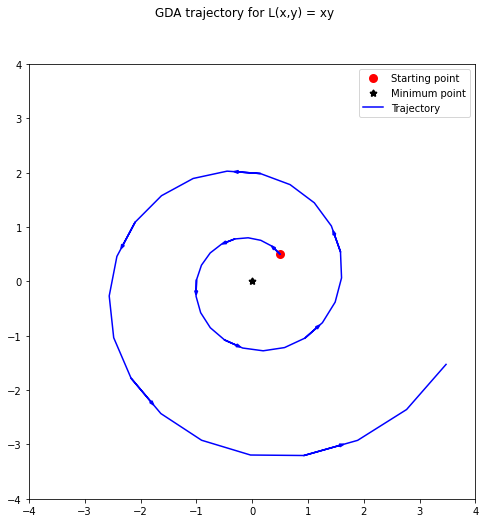

In [145]:
z0 = np.array([0.5,.5])
gamma = 0.3
max_iters = 40

points, update_directions = GDA(z0, gamma, max_iters)

## Extra Gradient Method 
$z' = z_t - sF(z_t), z_t = z - sF(z)$
Thanks to the computation of the intermediary point z_t, this method spirals inwards, converging to the minimum.

In [146]:
def EGM(z0, gamma, max_iters, plot = True):
    """Extra Gradient Method"""
    points = []
    update_directions = []

    z = np.copy(z0)
    z_t = np.copy(z0)
    for n_iter in range(max_iters):
        points.append(np.copy(z))
        # Update intermediary point
        grad_z = F(z)
        z_t = z - gamma*grad_z

        # Update next point
        update_direction = -F(z_t)
        z += gamma*update_direction

        update_directions.append(np.copy(update_direction))


    if plot:
        plot_trajectory(points, update_directions, max_iters, 'EGM trajectory for L(x,y) = xy', nb_arrows = 15, line_color='g')

    return points, update_directions

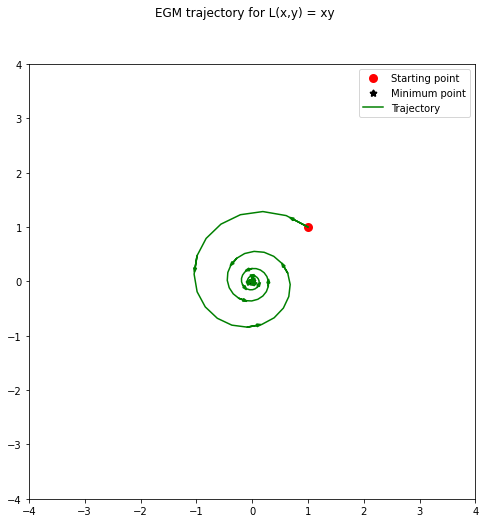

In [147]:
z0 = np.array([1.,1.])
gamma = 0.3
max_iters = 100

points, update_directions = EGM(z0, gamma, max_iters)

## Optimistic Gradient Descent Ascent
$z'' = z' - 2sF(z') + sF(z)$

In [148]:
def OGDA(z0, gamma, max_iters, plot = True):
    """Optimistic Gradient Descent Ascent Method"""
    points = []
    update_directions = []

    z = np.copy(z0)
    
    # First iteration
    points.append(np.copy(z))
    # Compute update direction
    update_direction = -F(z)
    update_directions.append(np.copy(update_direction))

    # Update z with the algorithm
    z += gamma * update_direction

    # Rest of the iterations
    for n_iter in range(1,max_iters):
        points.append(np.copy(z))
        # Update next iterate point
        grad_z = F(z)
        grad_z_minus_1 = F(points[n_iter - 1])

        update_direction = -2 * grad_z + grad_z_minus_1
        update_directions.append(update_direction)

        z += gamma*update_direction


    if plot:
        plot_trajectory(points, update_directions, max_iters, 'OGDA trajectory for L(x,y) = xy', nb_arrows = 15, line_color='orange')

    return points, update_directions

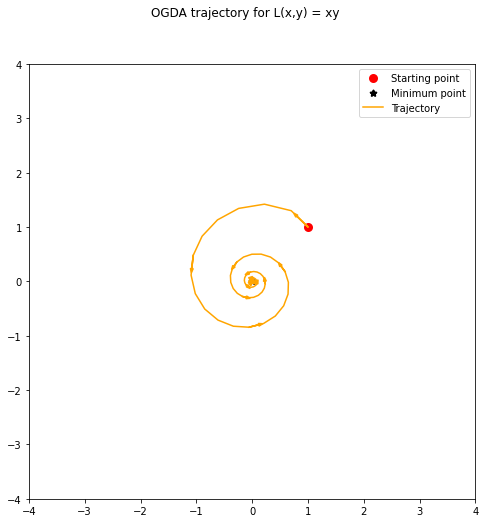

In [149]:
z0 = np.array([1.,1.])
gamma = 0.3
max_iters = 100

points, update_directions = OGDA(z0, gamma, max_iters)

## Jacobian Method 
$z' = z + s\nabla F(z) F(z)$

In [150]:
def Grad_F(z):
    return np.array([[0, 1],[-1,0]])

In [151]:
def JM(z0, gamma, max_iters, plot = True):
    """Jacobian Method"""
    points = []
    update_directions = []

    z = np.copy(z0)
    for n_iter in range(max_iters):
        points.append(np.copy(z))
        # Update next iterate point
        grad_z = F(z)
        grad_F = Grad_F(z)

        update_direction = grad_F @ grad_z
        update_directions.append(update_direction)

        z += gamma*update_direction


    if plot:
        plot_trajectory(points, update_directions, max_iters, 'JM trajectory for L(x,y) = xy', nb_arrows = 2, line_color='yellow')

    return points, update_directions

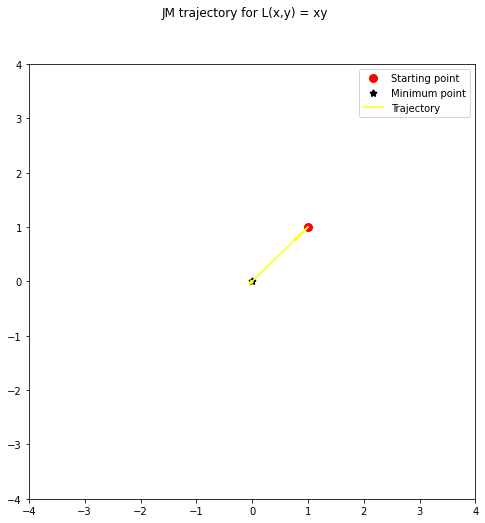

In [152]:
z0 = np.array([1.,1.])
gamma = 0.3
max_iters = 100

points, update_directions = JM(z0, gamma, max_iters)

Compare all of them on the same plot

In [156]:
def compare_all_methods(z0, gamma, max_iters):
    z_gda, updts_gda = GDA(z0, gamma, max_iters, False)
    z_egm, updts_egm = EGM(z0, gamma, max_iters, False)
    z_ogda, updts_ogda = OGDA(z0, gamma, max_iters, False)
    z_jm, updts_jm = JM(z0, gamma, max_iters, False)

    zs = [z_gda, z_egm, z_ogda, z_jm]
    colors = ['b', 'g', 'orange', 'yellow']
    titles = ['GDA', 'EGM', 'OGDA', 'JM']

    plt.scatter(z0[0], z0[1], color = 'r', lw = 3, label = "Starting point")
    plt.scatter(0, 0, color = 'k', lw = 2, label = "Minimum point", marker='*')

    for i in range(len(zs)):
        points = zs[i]
        xs = [z[0] for z in points]
        ys = [z[1] for z in points]
        plt.rcParams["figure.figsize"] = (8,8)
        plt.plot(xs, ys, color = colors[i], label = f'{titles[i]}')

    ax_lim = 4
    plt.xlim(-ax_lim,ax_lim)
    plt.ylim(-ax_lim,ax_lim)
    plt.legend(loc = 'upper right')
    plt.suptitle('Trajectories of the 4 methods') 

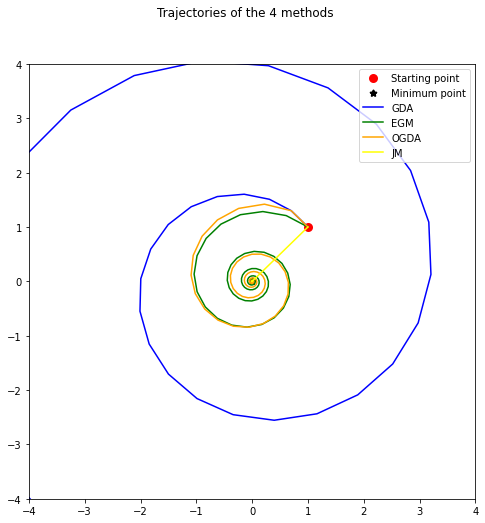

In [157]:
z0 = np.array([1.,1.])
gamma = 0.3
max_iters = 100
compare_all_methods(z0, gamma, max_iters)